In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [80]:
import re
from itertools import izip

Оценим марковскую цепь, управляющую символами русского алфавита в книге "Война и мир"

In [47]:
with open('data/book1.txt') as book:
    data = book.read()
data = data.decode('utf-8')

In [96]:
RUSSIAN = u'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'

In [97]:
mc = dict.fromkeys(RUSSIAN, None)
for c in RUSSIAN:
    mc[c] = dict.fromkeys(RUSSIAN, 0)

In [98]:
print data[:1000]

Лев Николаевич Толстой
Война и мир. Книга 1

Война и мир – 1

 
 http://www.lib.ru

Аннотация 

Роман Льва Толстого «Война и мир» лежит в основании величественного здания русской классической литературы. С непревзойденным мастерством Толстой воссоздал великую духом Россию – образы этой «книги на все времена» и сейчас пленяют свежестью чувств и щедростью души, искренностью страстей, силой и чистотой убеждений.
В книгу вошли первый и второй тома романа.

Лев Николаевич Толстой
ВОЙНА И МИР

Том 1

ЧАСТЬ ПЕРВАЯ


I

– Еh bien, mon prince. Genes et Lucques ne sont plus que des apanages, des поместья, de la famille Buonaparte. Non, je vous previens, que si vous ne me dites pas, que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocites de cet Antichrist (ma parole, j'y crois) – je ne vous connais plus, vous n'etes plus mon ami, vous n'etes plus мой верный раб, comme vous dites. [Ну, что, князь, Генуа и Лукка стали не бо


In [99]:
russian_only = ''.join(re.findall(U'[А-Яа-яё]+', data)).lower()

In [100]:
print russian_only[:1000]

левниколаевичтолстойвойнаимиркнигавойнаимираннотацияроманльватолстоговойнаимирлежитвоснованиивеличественногозданиярусскойклассическойлитературыснепревзойденныммастерствомтолстойвоссоздалвеликуюдухомроссиюобразыэтойкнигинавсевременаисейчаспленяютсвежестьючувствищедростьюдушиискренностьюстрастейсилойичистотойубежденийвкнигувошлипервыйивторойтомароманалевниколаевичтолстойвойнаимиртомчастьперваяепоместьямойверныйрабнучтокнязьгенуаилуккасталинебольшекакпоместьямифамилиибонапартенетяваспредупреждаюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритенуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоре

In [101]:
for cp, cn in izip(russian_only[:-1], russian_only[1:]):
    mc[cp][cn] += 1

In [120]:
for cp, count_by_cn in mc.iteritems():
    norm = sum(count_by_cn.values())
    mc[cp] = {cn: float(count) / float(norm) for cn, count in count_by_cn.iteritems()}

In [125]:
mc_matrix = np.zeros((33, 33))
for cp in RUSSIAN:
    for cn in RUSSIAN:
        mc_matrix[RUSSIAN.index(cp)][RUSSIAN.index(cn)] = mc[cp][cn]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


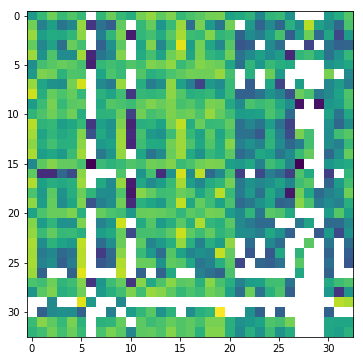

In [129]:
figure(figsize=(6, 6))
plt.imshow(np.log(mc_matrix), interpolation='nearest')

In [131]:
print mc[u'п'][u'ы']

0.00963126999192


<Container object of 33 artists>

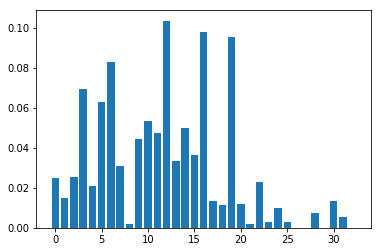

In [124]:
plt.bar(range(33), mc[u'я'].values())

Подсчитаем вероятности наблюдать некоторые строки.

In [138]:
s = u'мама'
proba = 1. / len(RUSSIAN)
for cp, cn in izip(s[:-1], s[1:]):
    proba *= mc[cp][cn]
print proba

2.0153998813e-05


In [139]:
s = u'константинопольский'
proba = 1. / len(RUSSIAN)
for cp, cn in izip(s[:-1], s[1:]):
    proba *= mc[cp][cn]
print proba

7.12135080638e-22


In [140]:
s = u'мамамамамамамамамама'
proba = 1. / len(RUSSIAN)
for cp, cn in izip(s[:-1], s[1:]):
    proba *= mc[cp][cn]
print proba

2.32367702285e-23


Подсчитаем вероятности наблюдать строки с заданными началом и концом.

In [142]:
start = u'х'
end = u'й'
length = 3
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    proba = prior * mc[start][c] * mc[c][end]
    if proba > 0:
        print ''.join([start, c, end]), proba

хай 4.38012629344e-05
хвй 3.23286414874e-08
хей 1.32206754118e-05
хзй 1.39947943493e-08
хий 3.92959699592e-05
хйй 2.40654985476e-10
хкй 2.20844273506e-08
хлй 3.10674088228e-08
хмй 2.17792583355e-08
хой 0.000395888720768
хрй 1.45905654848e-08
хсй 2.74295252423e-08
хтй 1.48074842563e-08
хуй 2.94834300926e-06
ххй 6.76195608092e-09
хэй 5.89171184121e-07
хяй 1.58134181297e-07


Генерирование выборок из марковской цепи.

In [156]:
s = []
start = np.random.choice(list(RUSSIAN))
s.append(start)
length = 10
for i in xrange(length):
    index = RUSSIAN.index(s[i])
    next_char = np.random.choice(list(RUSSIAN), p=mc_matrix[index])
    s.append(next_char)

In [157]:
print ''.join(s)

цобовсисовс
